In [18]:
import pandas as pd
from collections import defaultdict 

# Load the CSV file to check its content
df = pd.read_csv('persona.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

,id,原文,標籤
0,1,大家好，我是一個充滿好奇心和熱情的人。我喜歡挑戰自己，探索未知領域。我是一位藝術愛好者，喜歡...,"藝術愛好者, 運動愛好者, 探索未知領域"
1,2,嗨，大家好！我是一個熱愛交流和建立連結的人。我喜歡與不同背景和文化的人交流，從中學習新的觀點...,交流和建立連結、音樂、科技、旅行
2,3,大家好，我是一個富有創造力和決心的人。我喜歡挑戰傳統，尋找新的解決方案和機會。我是一個藝術家...,創造力、挑戰傳統、藝術、創業、社會變革
3,4,嗨，大家好！我是一個喜歡冒險和探索的人。我喜歡挑戰自己，突破舒適圈，勇於嘗試新的事物。我是一...,冒險和探索、自然愛好者、社區建設、志願服務、學習和成長
4,5,大家好，我是一個充滿熱情和正能量的人。我喜歡將我的能量和激情帶給身邊的人，讓他們感受到生活的...,音樂愛好者、彈奏吉他、創作音樂、動物愛護者、參與動物保護活動


In [19]:
# 處理標籤欄位，確保每個關鍵字都被正確的分割為獨立的節點
df['標籤'] = df['標籤'].str.replace('、', ',').str.split(',')

# 創建關鍵字與ID之間的映射對照表
keyword_to_ids = defaultdict(list)
id_to_keywords = defaultdict(list)

for index, row in df.iterrows():
    id = row['id']
    id_to_keywords[id].append
    keywords = [keyword.strip() for keyword in row['標籤']]
    for keyword in keywords:
        keyword_to_ids[keyword].append(id)

In [20]:
id_to_keywords

defaultdict(list,
            {1: [],
             2: [],
             3: [],
             4: [],
             5: [],
             6: [],
             7: [],
             8: [],
             9: [],
             10: [],
             11: [],
             12: [],
             13: [],
             14: [],
             15: [],
             16: [],
             17: [],
             18: [],
             19: [],
             20: []})

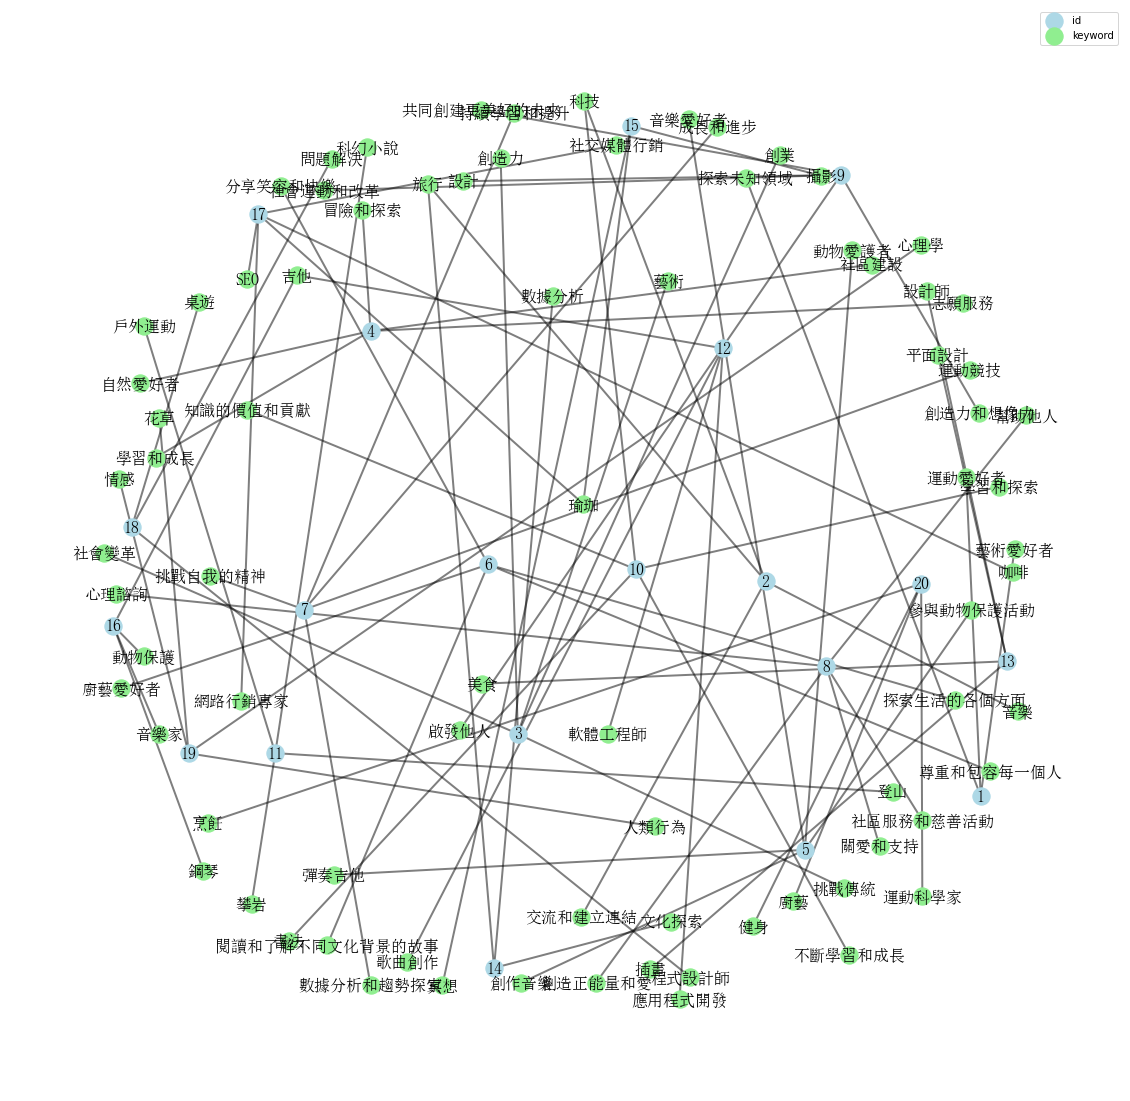

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# 使用 networkx
G = nx.Graph()

# 加點
for id in id_to_keywords:
    G.add_node(id, type='id')
for keyword in keyword_to_ids:
    G.add_node(keyword, type='keyword')

# 加邊
for keyword, ids in keyword_to_ids.items():
    for id in ids:
        G.add_edge(id, keyword)

# 畫圖
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=1, iterations=40)
nx.draw_networkx_nodes(G, pos, nodelist=id_to_keywords.keys(), node_color='lightblue', label='id')
nx.draw_networkx_nodes(G, pos, nodelist=keyword_to_ids.keys(), node_color='lightgreen', label='keyword')
nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=16, font_family='SimSun')

plt.axis('off')
plt.legend(scatterpoints=1)
plt.show()

!pip install -U python-louvain

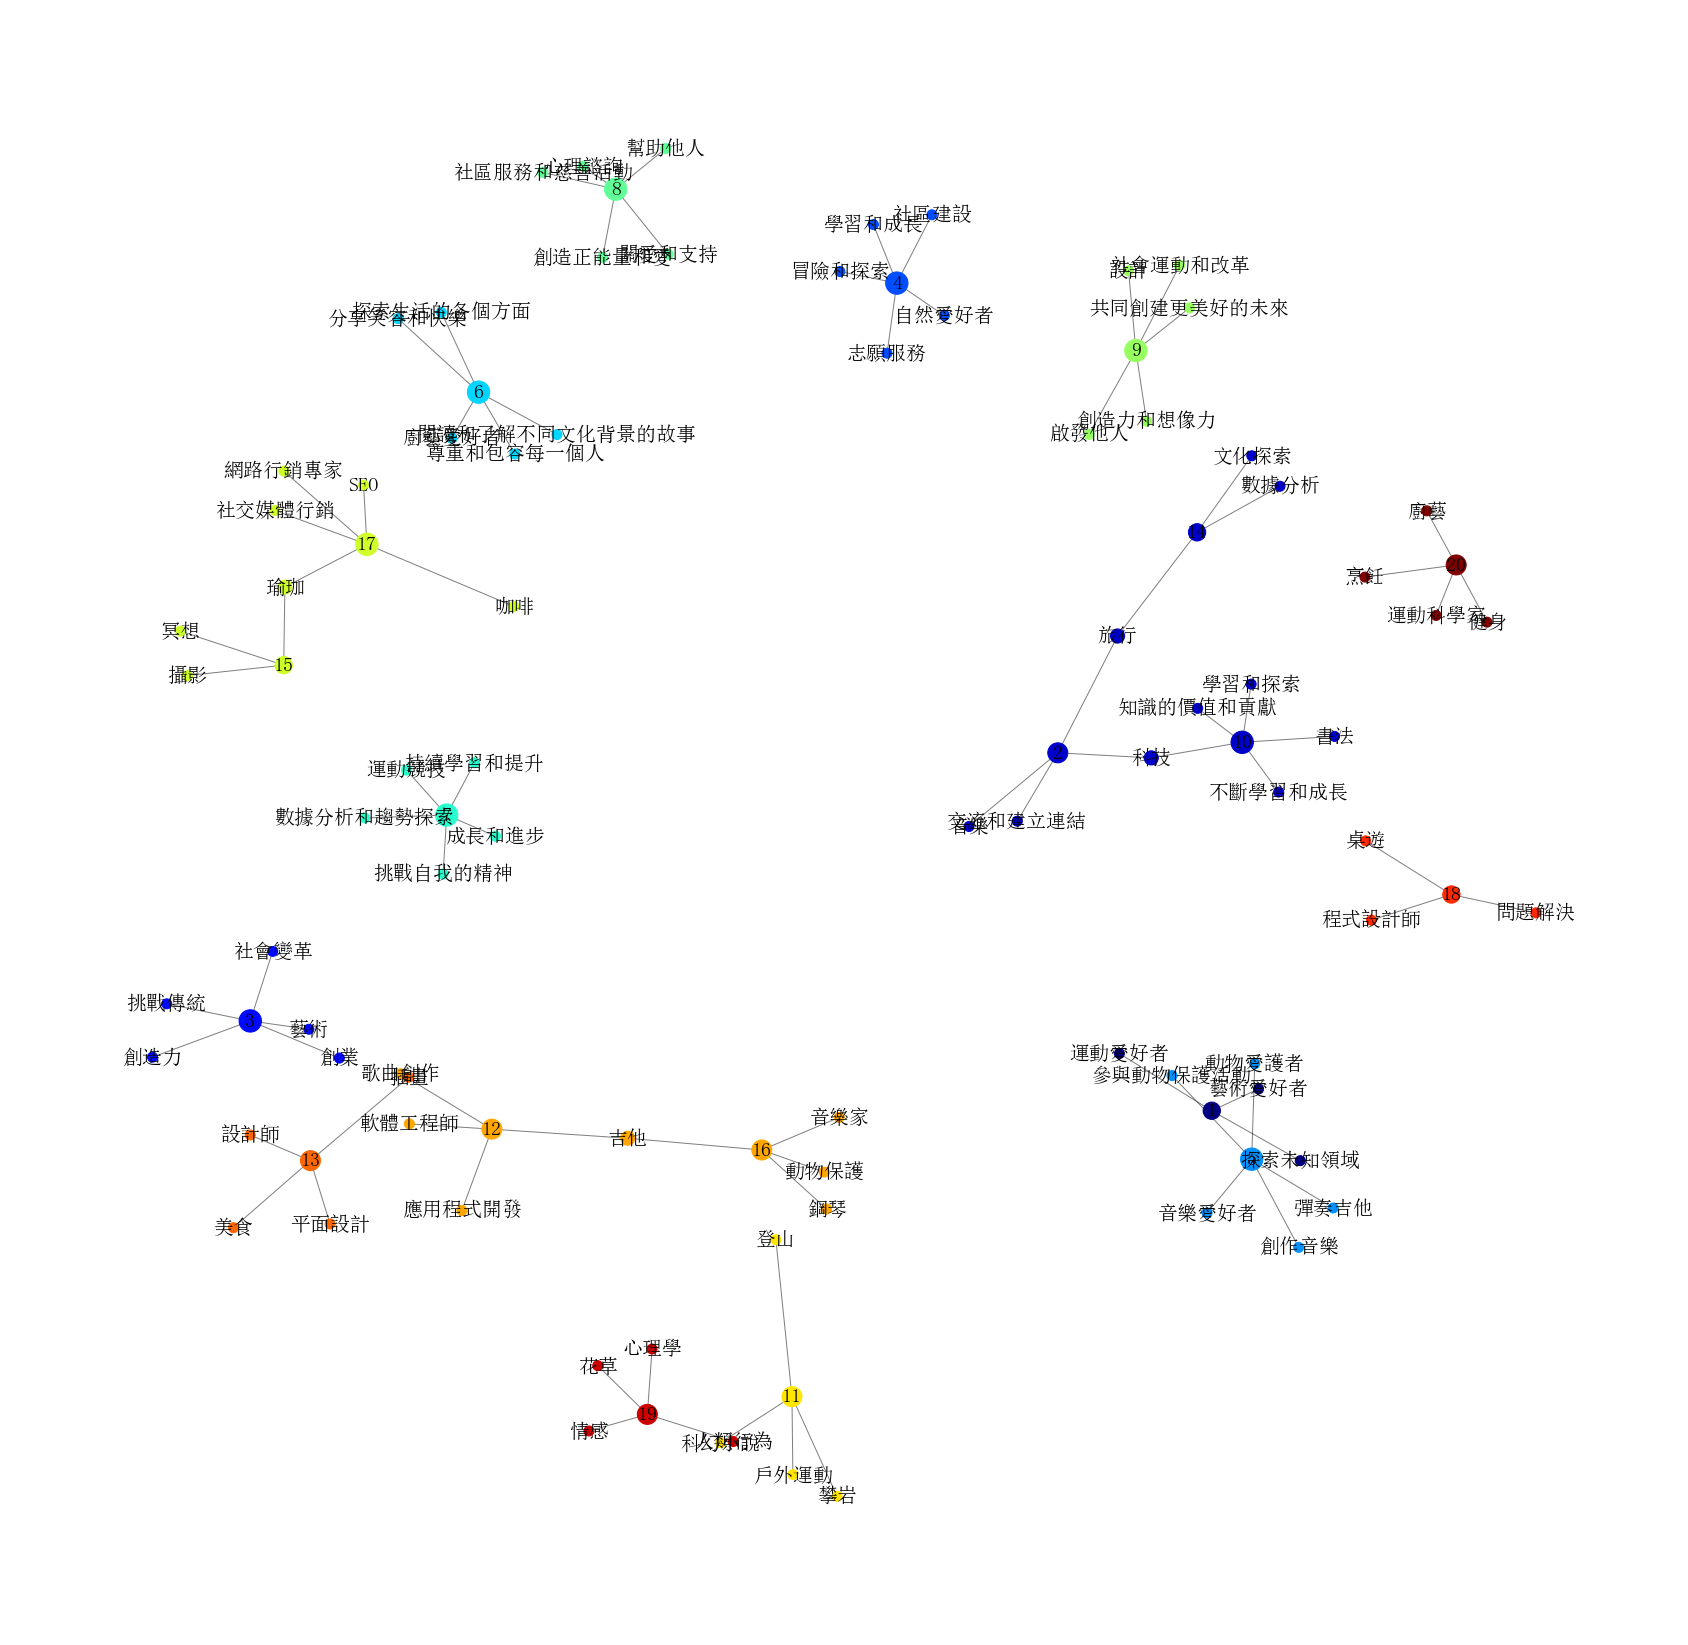

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

partition = community_louvain.best_partition(G)

community_colors = {node: partition[node] for node in G.nodes()}
values = [community_colors[node] for node in G.nodes()]

node_sizes = [100 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.15, iterations=40) 

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=values, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='SimSun')

plt.axis('off')
plt.show()